# Data Fitting

In [1]:
from math import exp, cos, sin
import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt

# Part I: functional fitting

In [2]:
def fit_function(x,y,b):
    # Construct generalized vandermonde matrix B
    m = x.shape[0]
    n = b.shape[0]

    B = np.array([[b[i](*x[j]) for i in range(n)] for j in range(m)])
    
    # Construct the Singular value decomposition of B
    U, Sigma, Vt = lg.svd(B, full_matrices=False)
    Sigma = np.diag(Sigma)

    # Compute the linear combination coefficients
    c = Vt.T @ lg.inv(Sigma) @ U.T @ y #This should be Vt.T, not Vt
    return c

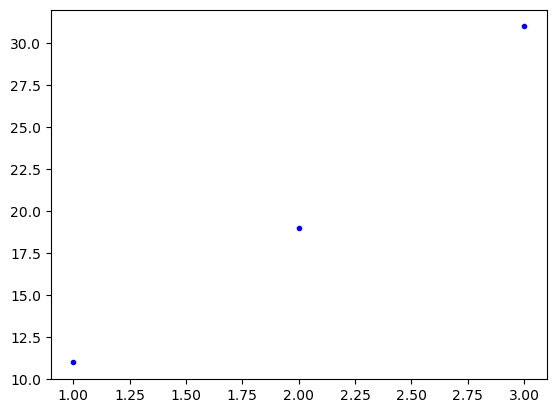

c= [10.          0.33333333]


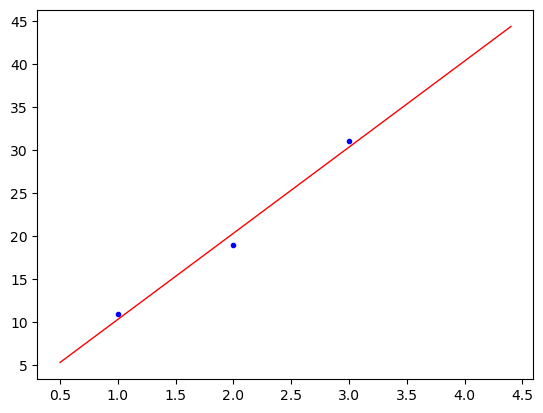

In [3]:
# Example 1: Captain Conundrum
x = np.array([
    [1],
    [2],
    [3]])
y =np.array([ 
     11,
     19,
     31])
b = np.array([
    lambda x:x, 
    lambda x:1])

plt.plot(x, y, 'o', markersize=3, color='b')
plt.show()

# Call the program
c = fit_function(x,y,b)

# Output
print('c=',c)
n = b.shape[0]
f = lambda x : sum([c[i]*b[i](x) for i in range(n)])
t = np.arange(0.5, 4.5, 0.1)
s = np.array([f(tt) for tt in t])
plt.plot(x, y, 'o', markersize=3, color='b')
plt.plot(t, s,      linewidth=1, color='r')
plt.show()

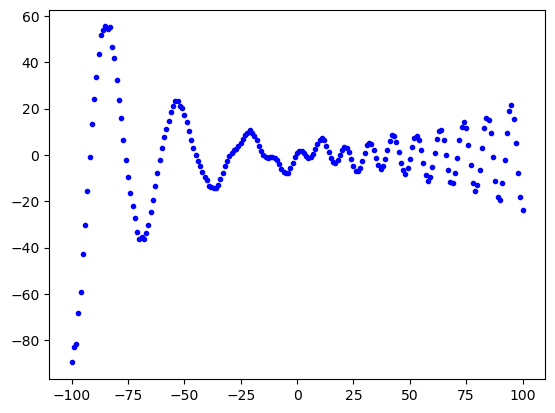

c= [ 3.0073567   0.99274874 -1.99674565  3.97376806]


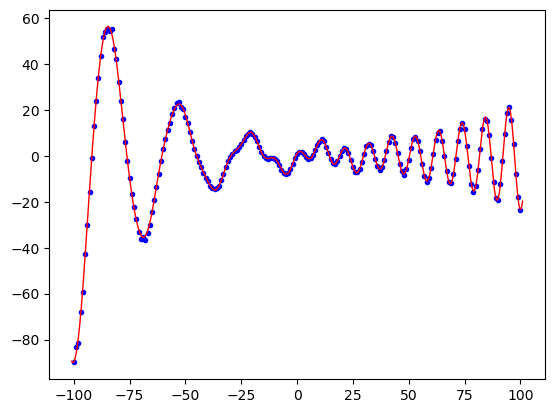

In [4]:
# Example 2: input data
xy = np.genfromtxt('data_f.csv', delimiter=',')
x  = np.array(xy[:,0:1])
y  = np.array(xy[:,1])

b  = np.array([
    lambda x: exp( 0.02*x)*cos(0.6*x), 
    lambda x: exp( 0.02*x)*sin(0.6*x),
    lambda x: exp(-0.03*x)*cos(0.2*x),
    lambda x: exp(-0.03*x)*sin(0.2*x)])

plt.plot(x, y, 'o', markersize=3, color='b')
plt.show()

# Call the program
c = fit_function(x,y,b)

# Output
print('c=',c)
n = b.shape[0]
f = lambda x : sum([c[i]*b[i](x) for i in range(n)])
t = np.arange(-101, 101, 0.01)
s = np.array([f(tt) for tt in t])
plt.plot(x, y, 'o', markersize=3, color='b')
plt.plot(t, s,      linewidth=1, color='r')
plt.show()

# Part II: relation

In [5]:
def fit_relation(x,b):

    # Construct generalized vandermonde matrix
    m = x.shape[0]
    n = b.shape[0]

    B = np.array([[b[i](*x[j]) for i in range(n)] for j in range(m)])
    print("B", B.shape)
            
    # Singular value decomposition
    S = B.T @ B
    print("S", S.shape)
    e_val, e_vec = lg.eig(S)
    print(e_val.shape)
    print(e_vec.shape)
    # Compute the linear combination coefficients
    k = np.argmin(e_val)
    c = e_vec[:,k]
    
    return c

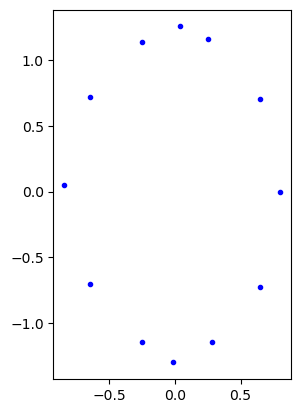

B (12, 5)
S (5, 5)
(5,)
(5, 5)
c= [-0.78983654 -0.33597853 -0.01084513 -0.0040875   0.51297402]


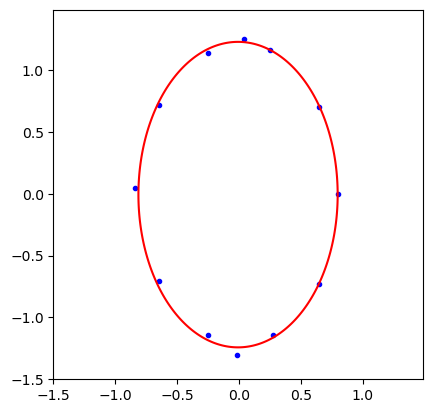

In [6]:
# Example 1: ellipse
x = np.array([
    [ 0.647212,  0.705344],
    [ 0.255212,  1.161268],
    [ 0.040816,  1.256092],
    [-0.247212,  1.141268],
    [-0.647212,  0.721344],
    [-0.841324,  0.05    ],
    [-0.647212, -0.705344],
    [-0.247212, -1.141268],
    [-0.012964, -1.300124],
    [ 0.279212, -1.141268],
    [ 0.647212, -0.729344],
    [ 0.8     ,  0.      ]])

# ellipse model
b = np.array([
    lambda x,y:x**2, 
    lambda x,y:y**2, 
    lambda x,y:x,
    lambda x,y:y,
    lambda x,y:1])

P = plt.plot(x[:,0],x[:,1],'o', markersize=3, color='b')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Call the program
c = fit_relation(x,b)

# Output
print('c=',c)
n = b.shape[0]
f = lambda x,y : sum([c[i]*b[i](x,y) for i in range(n)])
delta = 0.01
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y   = np.meshgrid(xrange,yrange)
P = plt.plot(x[:,0],x[:,1],'o', markersize=3, color='b')
plt.contour(X,Y,f(X,Y),[0],colors=['r'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

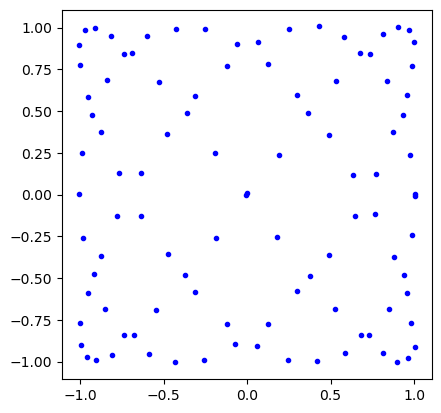

B (101, 8)
S (8, 8)
(8,)
(8, 8)
c= [ 0.37664426 -0.01375045 -0.7594379   0.12065889  0.47900828 -0.15716486
 -0.09673737  0.05601506]


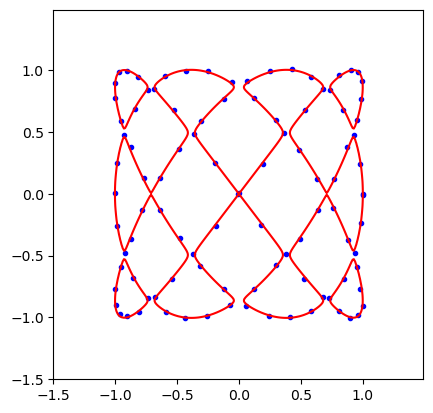

In [7]:
# Example 2: 
x = np.genfromtxt('data_r.csv', delimiter=',')
b = np.array([
    lambda x,y:x**8, 
    lambda x,y:y**8, 
    lambda x,y:x**6, 
    lambda x,y:y**6,
    lambda x,y:x**4, 
    lambda x,y:y**4, 
    lambda x,y:x**2,
    lambda x,y:y**2])

P = plt.plot(x[:,0],x[:,1],'o', markersize=3, color='b')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Call the program
c = fit_relation(x,b)

# Output
print('c=',c)
n = b.shape[0]
f = lambda x,y : sum([c[i]*b[i](x,y) for i in range(n)])
delta = 0.01
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y   = np.meshgrid(xrange,yrange)
plt.plot(x[:,0],x[:,1],'o', markersize=3, color='b')
plt.contour(X,Y,f(X,Y),[0],colors=['r'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()